In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy



In [2]:
#create a set of random latitude (-90 to 90) and longitude (-180 to 180) combinations

#get individual coordinates for lats and lngs
lats=np.random.uniform(-90, 90, size=1500)
lngs=np.random.uniform(-180, 180, size=1500)

#combine the individual lats and lngs generated above
lat_lngs=zip(lats, lngs)
lat_lngs

#zip packs each pair of lats and lngs having the same index in their respenctive array into a tuple.

In [3]:
#add the lats and longs to a list
coordinates=list(lat_lngs)


In [4]:
#initialize cities list
cities=[]

#identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique then add to city list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

589

In [5]:
#import requests library and weather api key
import requests
from config import weather_api_key

#build basic URL for openweathermap w api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=59d039735d5fe09c542f4debb16b240d


In [6]:
#import the time library and datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for  i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i%50==0 and i>=50):
        set_count+=1
        record_count=1
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url=url+"&q="+city.replace(" ", "+")
    
    #log the url, record, and set numbers and the city
    print(f"Proessing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count+=1

    #use a try and accept block to get data from json file and then print an error if there is an error
    try:
        #parse the JSOn and regrieve data
        city_weather=requests.get(city_url).json()

        #parse out the data we need
        city_lat=city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #convert data to iso standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")

        #append the city info into the city_data list
        city_data.append({
            "City":city.title(),
            "Lat":city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    #if there is an error, skip city
    except:
        print("City not found. Skipping...")
        pass

#indicate data loading is complete
print("--------------------------")
print("Data Retrieval Complete   ")
print("--------------------------")

Beginning Data Retrieval     
-----------------------------
Proessing Record 1 of Set 1 | albany
Proessing Record 2 of Set 1 | darhan
Proessing Record 3 of Set 1 | vaini
Proessing Record 4 of Set 1 | nikolskoye
Proessing Record 5 of Set 1 | ponta do sol
Proessing Record 6 of Set 1 | yokadouma
Proessing Record 7 of Set 1 | valparaiso
Proessing Record 8 of Set 1 | botou
Proessing Record 9 of Set 1 | hermanus
Proessing Record 10 of Set 1 | camocim
Proessing Record 11 of Set 1 | sitka
Proessing Record 12 of Set 1 | ushuaia
Proessing Record 13 of Set 1 | atuona
Proessing Record 14 of Set 1 | luderitz
Proessing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Proessing Record 16 of Set 1 | puerto del rosario
Proessing Record 17 of Set 1 | longyearbyen
Proessing Record 18 of Set 1 | tuktoyaktuk
Proessing Record 19 of Set 1 | saint-philippe
Proessing Record 20 of Set 1 | ternate
Proessing Record 21 of Set 1 | puerto ayora
Proessing Record 22 of Set 1 | chumikan
Proessing Recor

Proessing Record 43 of Set 4 | markova
Proessing Record 44 of Set 4 | bathsheba
Proessing Record 45 of Set 4 | pochutla
Proessing Record 46 of Set 4 | roshal
Proessing Record 47 of Set 4 | launceston
Proessing Record 48 of Set 4 | salalah
Proessing Record 49 of Set 4 | arraial do cabo
Proessing Record 50 of Set 4 | montrose
Proessing Record 1 of Set 5 | constitucion
Proessing Record 2 of Set 5 | yulara
Proessing Record 3 of Set 5 | goose creek
Proessing Record 4 of Set 5 | ye
City not found. Skipping...
Proessing Record 5 of Set 5 | takoradi
Proessing Record 6 of Set 5 | faanui
Proessing Record 7 of Set 5 | harper
Proessing Record 8 of Set 5 | ishigaki
Proessing Record 9 of Set 5 | cagayan de tawi-tawi
City not found. Skipping...
Proessing Record 10 of Set 5 | santarem
Proessing Record 11 of Set 5 | sentyabrskiy
City not found. Skipping...
Proessing Record 12 of Set 5 | verkhoyansk
Proessing Record 13 of Set 5 | mitsamiouli
Proessing Record 14 of Set 5 | itamaraca
Proessing Record 15 o

Proessing Record 35 of Set 8 | broome
Proessing Record 36 of Set 8 | muroto
Proessing Record 37 of Set 8 | cabo san lucas
Proessing Record 38 of Set 8 | portland
Proessing Record 39 of Set 8 | sahbuz
Proessing Record 40 of Set 8 | taksimo
Proessing Record 41 of Set 8 | provideniya
Proessing Record 42 of Set 8 | the valley
Proessing Record 43 of Set 8 | bombay
Proessing Record 44 of Set 8 | warrnambool
Proessing Record 45 of Set 8 | sri aman
Proessing Record 46 of Set 8 | ferrenafe
Proessing Record 47 of Set 8 | ivaipora
Proessing Record 48 of Set 8 | bambous virieux
Proessing Record 49 of Set 8 | celestun
Proessing Record 50 of Set 8 | fuerte olimpo
Proessing Record 1 of Set 9 | palmares do sul
Proessing Record 2 of Set 9 | vestmanna
Proessing Record 3 of Set 9 | silver city
Proessing Record 4 of Set 9 | amapa
Proessing Record 5 of Set 9 | tessalit
Proessing Record 6 of Set 9 | crab hill
City not found. Skipping...
Proessing Record 7 of Set 9 | iguape
Proessing Record 8 of Set 9 | exce

Proessing Record 25 of Set 12 | amderma
City not found. Skipping...
Proessing Record 26 of Set 12 | lalomanu
City not found. Skipping...
Proessing Record 27 of Set 12 | pretoria
Proessing Record 28 of Set 12 | santa marta
Proessing Record 29 of Set 12 | walvis bay
Proessing Record 30 of Set 12 | askiz
Proessing Record 31 of Set 12 | guangyuan
Proessing Record 32 of Set 12 | kyela
Proessing Record 33 of Set 12 | tilichiki
Proessing Record 34 of Set 12 | potenza
Proessing Record 35 of Set 12 | bosaso
Proessing Record 36 of Set 12 | tommot
Proessing Record 37 of Set 12 | olafsvik
Proessing Record 38 of Set 12 | manono
Proessing Record 39 of Set 12 | meyungs
City not found. Skipping...
--------------------------
Data Retrieval Complete   
--------------------------


In [8]:
len(city_data)

539

In [9]:
city.title()

'Meyungs'

In [10]:
#convert the array of dictionaries to pandas dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,16.38,56,4,1.01,US,2022-02-05 22:50:36
1,Darhan,49.4867,105.9228,-6.30,92,83,6.31,MN,2022-02-05 22:53:07
2,Vaini,-21.2000,-175.2000,77.16,100,100,12.66,TO,2022-02-05 22:52:50
3,Nikolskoye,59.7035,30.7861,27.88,95,100,7.54,RU,2022-02-05 22:52:58
4,Ponta Do Sol,32.6667,-17.1000,66.83,56,9,11.74,PT,2022-02-05 22:51:37
5,Yokadouma,3.5167,15.0500,68.32,26,96,2.66,CM,2022-02-05 22:53:08
6,Valparaiso,-33.0393,-71.6273,80.83,57,0,16.11,CL,2022-02-05 22:53:08
7,Botou,38.0667,116.5667,24.80,49,9,3.69,CN,2022-02-05 22:53:08
8,Hermanus,-34.4187,19.2345,68.81,84,23,13.82,ZA,2022-02-05 22:50:24
9,Camocim,-2.9022,-40.8411,78.76,83,37,12.03,BR,2022-02-05 22:53:09


In [11]:
col_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df=city_data_df[col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-02-05 22:50:36,42.6001,-73.9662,16.38,56,4,1.01
1,Darhan,MN,2022-02-05 22:53:07,49.4867,105.9228,-6.30,92,83,6.31
2,Vaini,TO,2022-02-05 22:52:50,-21.2000,-175.2000,77.16,100,100,12.66
3,Nikolskoye,RU,2022-02-05 22:52:58,59.7035,30.7861,27.88,95,100,7.54
4,Ponta Do Sol,PT,2022-02-05 22:51:37,32.6667,-17.1000,66.83,56,9,11.74
...,...,...,...,...,...,...,...,...,...
534,Potenza,IT,2022-02-05 23:07:21,40.6443,15.8086,44.92,81,98,2.66
535,Bosaso,SO,2022-02-05 23:02:28,11.2842,49.1816,71.82,70,82,2.68
536,Tommot,RU,2022-02-05 23:07:21,58.9564,126.2925,-15.90,99,100,1.34
537,Olafsvik,IS,2022-02-05 23:03:01,64.8945,-23.7142,30.94,80,100,36.44


In [13]:
#create the output file (CSV)
output_data_file="weather_data/cities.csv"

#export the city_data into csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#extract relevant fields from the dataframe for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

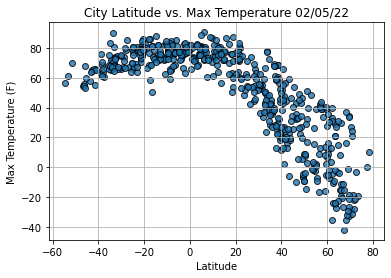

In [16]:
#Import time module
import time

#build scatterplot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

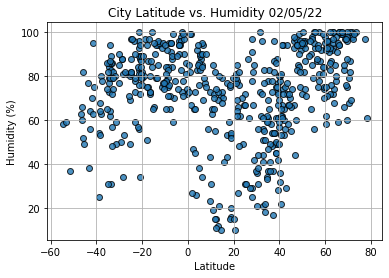

In [18]:
#build scatterplot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

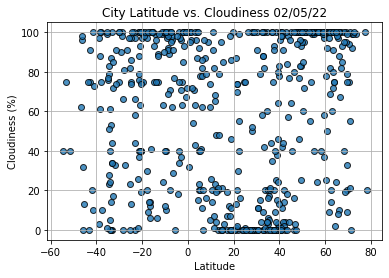

In [19]:
#build scatterplot for latitude vs coudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

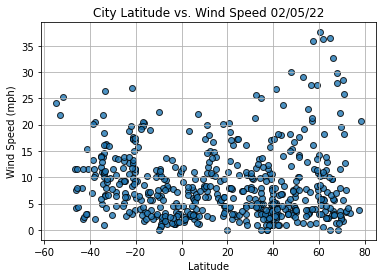

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()